# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

I would like to focus on rising prices for necessities of the modern american, those being things such as groceries, gas, housing, since the end of the great recession. The great recession lasted until 2009, so I am hoping to scope data from 2010 to 2024. I would like to identify which of these 3 has seen the most inflation in price by percentage. This problem is important as many people believe we are going into another recession currently, which is indicated generally by ballooning of prices finally popping and rapid dropping, for instance in the great recession, the cause which is usually pointed out is the housing market pop, which had massively over inflated prices then. I personally find it important as well, as I am very interested in the economy of the United States and am interested to see how these prices compare to eachother.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

Which necessity category has the highest inflation between groceries, gas, and housing since the great recession? 
Which necessity category has the lowest inflation? 
What time period saw the most inflation for each category?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

I hypothesize that the answer would be housing has the most inflation percentage accross the three neccessity categories, gas to have the least, and when it comes to time period I would think 2020-2024 for all of them would be the highest due to bad economic policies.

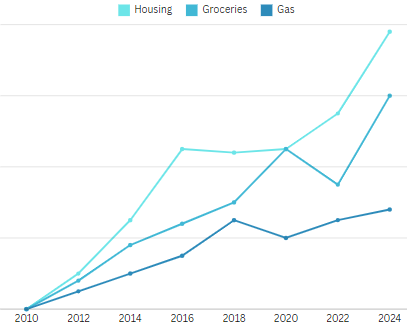

I would think an answer could look like this, some sort of graph which shows the clear answer of which of the 3 has inflated the most and least by percentage. As well as showing over which time periods we saw the greatest inflation by percent.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

In [1]:
# Start your code here

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [2]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 1271 bytes to source.py
